# More Hilbert
## This time from Analytic Cycle

In [6]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [7]:
# Import some useful libraries and tools
import pandas as pd
import numpy as np
from scipy import signal
from numpy import pi

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [8]:
def bode_plot(h, w, plot_title='Bode plot'):
    """
    Bode amplitude and phase plot function
    """
    dB = 20 * np.log10(abs(h))
    phi = np.unwrap(np.angle(h))
    
#    lag = - (phi / 360) * (2.0 / (w / pi)) 
    
    w_ = w / (2 * pi)     # Set frequency in Cycles per day.
    fig, axs = plt.subplots(2, 1, sharex=True)

    plt.suptitle(plot_title, fontsize=16)
    
    axs[0].plot(w_, dB, 'b')
    axs[0].set_ylabel('Amplitude (dB)', color='b', fontsize=14)
    axs[0].set_ylim(ymin = -20)
    axs[0].grid()
        
    axs[1].plot(w_, phi, 'g')
    axs[1].set_ylabel(r'$\phi $ (deg)', color='g', fontsize=14)
    axs[1].set_xlabel('Frequency (Cycles per day)', fontsize=12)
    axs[1].set_xlim(xmax = 0.5)
    axs[1].grid()
    plt.show()

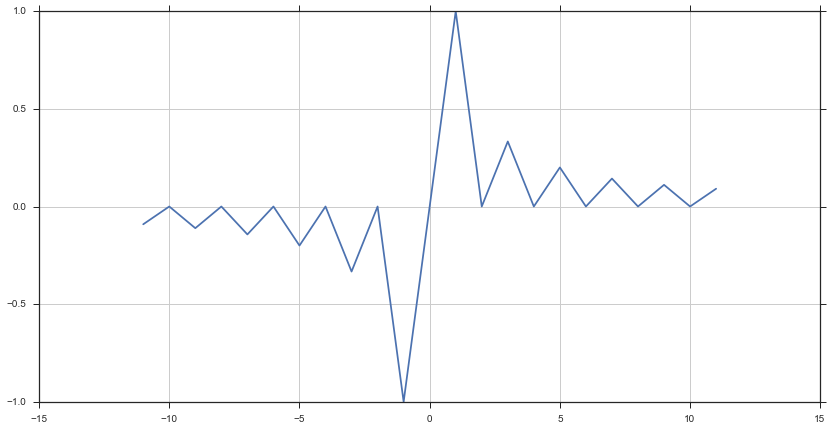

In [9]:
#Definition of the Hilber FIR filter
n = 11
idx = np.arange(-n, n+1)
hilbert_coeff = np.round(np.sin(pi / 2 * idx) ** 2 / idx, 3)
hilbert_coeff[n] = 0
plt.plot(idx, hilbert_coeff)
plt.grid()

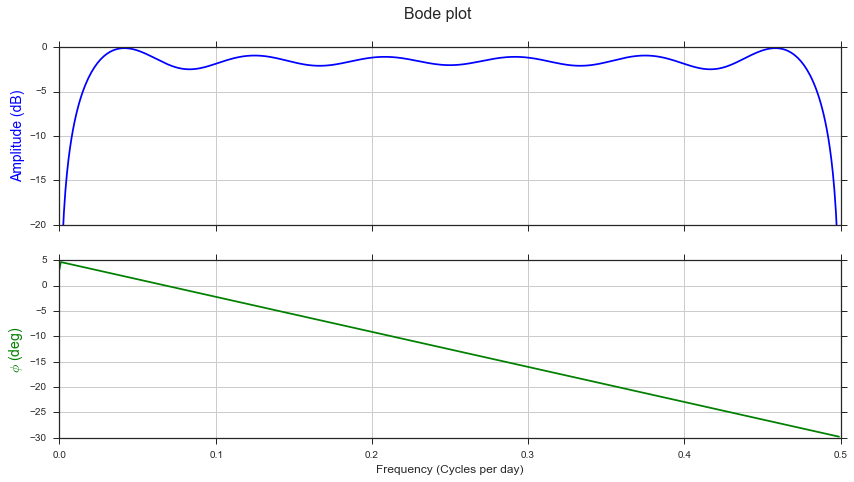

In [10]:
numerator = hilbert_coeff / hilbert_coeff[n:].sum()
denominator = np.array([1.0])

w, h = signal.freqz(numerator, denominator)
bode_plot(h, w)